In [5]:
# Es un problema de regresión: tenéis que predecir el precio del airbnb utilizando los datos disponibles.
# 1. Preparación de datos: División train/test

In [59]:
from sklearn.model_selection import train_test_split
import pandas as pd

df_airbnb = pd.read_csv(r'C:\Users\noeli\Desktop\Proyecto_ML\data\airbnb-listings-extract.csv', sep=';')

train, test = train_test_split(df_airbnb, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

train.to_csv(r'C:\Users\noeli\Desktop\Proyecto_ML\data\airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv(r'C:\Users\noeli\Desktop\Proyecto_ML\data\airbnb_test.csv', sep=';', decimal='.', index=False)

airbnb_train = pd.read_csv(r'C:\Users\noeli\Desktop\Proyecto_ML\data\airbnb_train.csv', sep=';', decimal='.')

airbnb_train.head(5).T

# Primero cargo el archivo csv, divido los datos en train (80%) y test (20%), guardo ambas partes en dos archivos csv y después visualizo las cinco primeras columnas de manera traspuesta

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Listing Url,https://www.airbnb.com/rooms/5994463,https://www.airbnb.com/rooms/14136180,https://www.airbnb.com/rooms/15520134,https://www.airbnb.com/rooms/8809721,https://www.airbnb.com/rooms/1162707
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,PISO ATOCHA- FLAT NEAR ATOCHA .,The Palace Sol Madrid.,por persona la noche metro linea5 vista alegre,CITY CENTER JACINTO BENAVENTE ROOM4,NICE & BIG DOUBLE ROOM AT DOWNTOWN
...,...,...,...,...,...
Cancellation Policy,moderate,flexible,moderate,strict,strict
Calculated host listings count,2.0,1.0,16.0,97.0,2.0
Reviews per Month,0.5,2.43,NaN,NaN,2.08
Geolocation,"40.4077318793,-3.68481869733","40.4158022422,-3.70534037765","40.3890481626,-3.74037392557","40.4128140929,-3.70305247638","40.4386311984,-3.71371613279"


In [61]:
# 2. Análisis exploratorio, por ejemplo:
# a. Head, describe, dtypes, etc.

In [63]:
airbnb_train.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


In [65]:
airbnb_train.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10317.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11780.000000,...,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000,9285.000000
mean,1.025308e+07,2.017038e+13,3.588310e+07,94.803722,12.754420,12.754420,40.491628,-3.776863,3.277486,1.285229,...,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313,1.873326
std,5.566485e+06,5.505346e+08,3.411993e+07,15.247078,34.578895,34.578895,4.701030,14.014695,2.093973,0.664691,...,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580,1.869157
min,1.986400e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.510692e+06,2.017041e+13,6.855490e+06,100.000000,1.000000,1.000000,40.409758,-3.707538,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.125754e+07,2.017041e+13,2.454770e+07,100.000000,2.000000,2.000000,40.419331,-3.700763,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,1.531982e+07,2.017041e+13,5.431096e+07,100.000000,6.000000,6.000000,40.430778,-3.683917,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.858361e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [67]:
airbnb_train.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

In [69]:
airbnb_train.isnull().sum()

ID                                   0
Listing Url                          0
Scrape ID                            0
Last Scraped                         0
Name                                 1
                                  ... 
Cancellation Policy                  0
Calculated host listings count       4
Reviews per Month                 2539
Geolocation                          0
Features                             1
Length: 89, dtype: int64

In [12]:
# b. Outliers

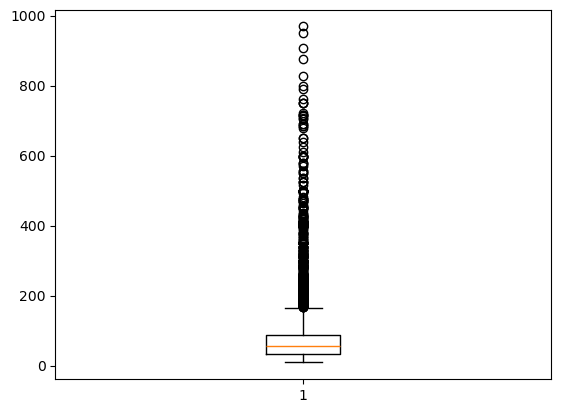

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = airbnb_train['Price'].quantile(0.25)
Q3 = airbnb_train['Price'].quantile(0.75)
IQR = Q3 - Q1

outliers = airbnb_train[(airbnb_train['Price'] < Q1 - 1.5 * IQR) | (airbnb_train['Price'] > Q3 + 1.5 * IQR)]

plt.boxplot(airbnb_train['Price'].dropna()) 
plt.show()

# Identifico posibles valores atípicos (outliers) en el precio de los alojamientos con el método del rango intercuartílico (IQR).
# Primero, calculo los cuartiles Q1 (percentil 25) y Q3 (percentil 75) de la variable Price y el IQR.
# Por último genero un boxplot para visualizar la distribución de precios y detectar gráficamente los outliers.

In [14]:
# c. Correlación

In [73]:
airbnb_train.select_dtypes(include='number').corr()

# Selecciono las columnas numéricas y calculo la matriz de correlación para evaluar la relación lineal de estas variables 

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
ID,1.000000,0.032498,0.613624,0.009607,-0.020606,-0.020606,-0.013738,0.029964,-0.091817,-0.066622,...,-0.413206,0.078535,0.089420,0.055910,0.072648,0.068015,0.030425,0.075672,-0.080388,0.199183
Scrape ID,0.032498,1.000000,0.039500,0.008985,0.009986,0.009986,-0.029580,0.158077,-0.005194,0.000925,...,-0.001259,-0.017499,-0.024348,-0.016019,-0.017030,-0.009166,-0.009074,-0.025690,0.006931,-0.026466
Host ID,0.613624,0.039500,1.000000,-0.026647,-0.072197,-0.072197,-0.009523,0.020668,-0.100388,-0.058610,...,-0.243913,0.021797,0.039551,0.024802,0.048561,0.037576,-0.015484,0.031593,-0.116955,0.170508
Host Response Rate,0.009607,0.008985,-0.026647,1.000000,-0.009751,-0.009751,-0.019138,0.006854,0.065430,-0.027406,...,0.130260,0.107322,0.087278,0.112881,0.106503,0.097228,0.060017,0.101076,-0.029763,0.180117
Host Listings Count,-0.020606,0.009986,-0.072197,-0.009751,1.000000,1.000000,0.002801,0.048783,0.227313,0.228873,...,-0.117593,-0.162006,-0.117002,-0.060883,-0.246700,-0.218376,-0.053526,-0.144403,0.919157,-0.152940
Host Total Listings Count,-0.020606,0.009986,-0.072197,-0.009751,1.000000,1.000000,0.002801,0.048783,0.227313,0.228873,...,-0.117593,-0.162006,-0.117002,-0.060883,-0.246700,-0.218376,-0.053526,-0.144403,0.919157,-0.152940
Latitude,-0.013738,-0.029580,-0.009523,-0.019138,0.002801,0.002801,1.000000,-0.493585,0.006899,-0.006339,...,0.018777,-0.016659,-0.016338,-0.015340,-0.008932,-0.014522,-0.023521,-0.016840,-0.001035,0.009437
Longitude,0.029964,0.158077,0.020668,0.006854,0.048783,0.048783,-0.493585,1.000000,0.018478,0.027128,...,-0.023857,-0.019877,-0.014745,-0.003844,-0.019938,-0.025431,-0.026176,-0.019351,0.050133,-0.006702
Accommodates,-0.091817,-0.005194,-0.100388,0.065430,0.227313,0.227313,0.006899,0.018478,1.000000,0.432238,...,0.057135,-0.048683,-0.046325,-0.014938,-0.069298,-0.051529,0.011398,-0.055966,0.254506,0.019308
Bathrooms,-0.066622,0.000925,-0.058610,-0.027406,0.228873,0.228873,-0.006339,0.027128,0.432238,1.000000,...,-0.077081,0.010758,0.005998,0.008362,-0.043889,-0.042465,0.005242,-0.003680,0.282004,-0.089753


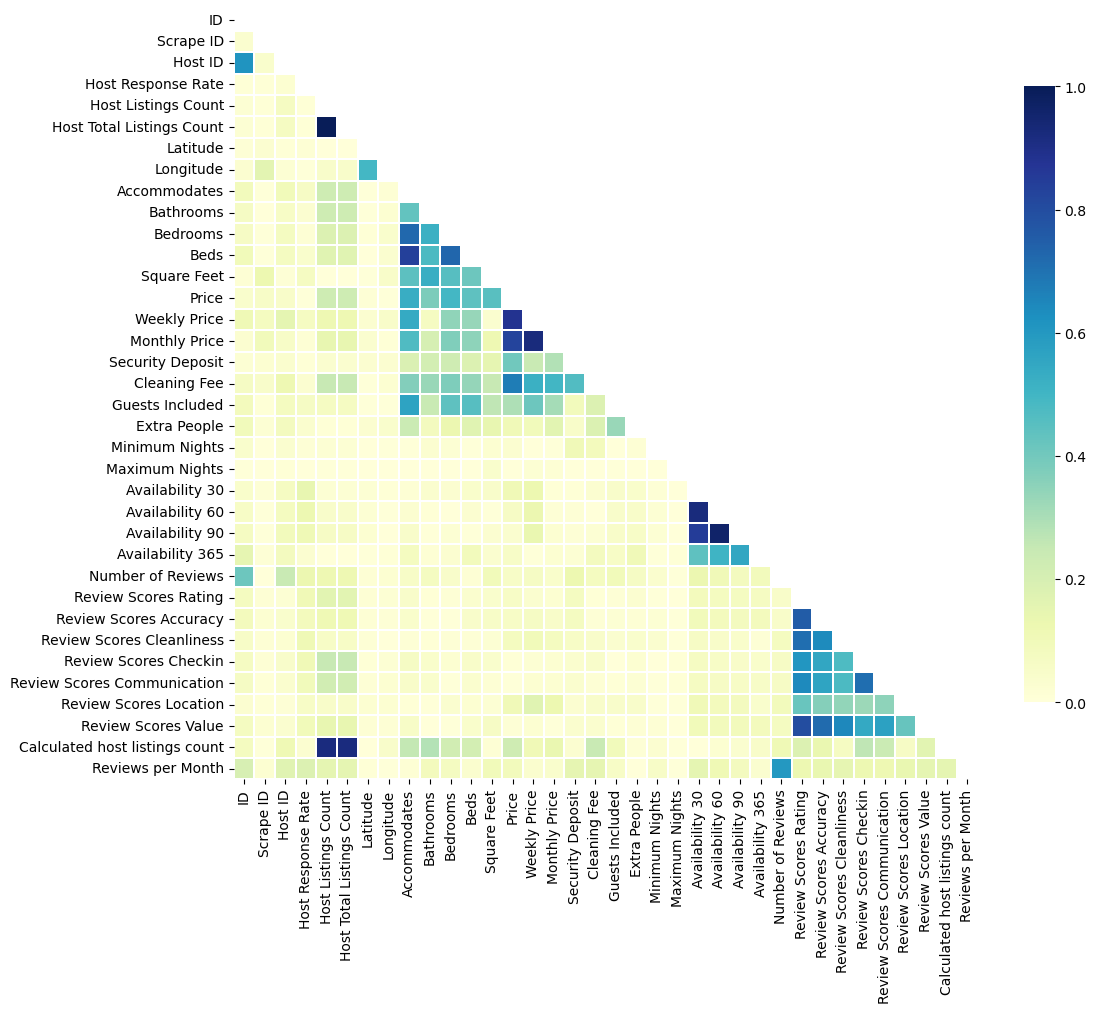

In [75]:
### GRAFICO DE CORRELACION ENTRE VARIABLES
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Selecciono solo las columnas numéricas
only_numbers = airbnb_train.select_dtypes(include='number').columns

# Calculo la matriz de correlación
matriz_correlacion = np.abs(airbnb_train[only_numbers].corr())

# Genero una máscara para el triángulo superior
mask = np.zeros_like(matriz_correlacion, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Dibujo la gráfica con la máscara
sns.heatmap(matriz_correlacion, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()


In [17]:
# 3. Preprocesamiento:
# a. Eliminación de variables, mediante selección (random forest/Lasso), alta correlación, alto porcentaje de missings, o el método que se considere oportuno.

In [77]:
#### ELIMINAR COLUMNAS POR VALORES NULOS

# Establezco un límite de porcentaje de valores nulos que voy a permitir

# Calculo el porcentaje de valores nulos por columna
nulos = airbnb_train.isnull().mean()

# Selecciono columnas a eliminar
eliminacion_columnas = nulos[nulos > 0.3].index

# Elimino las columnas del DataFrame
airbnb_train1 = airbnb_train.drop(columns=eliminacion_columnas)



In [79]:
#### ELIMINAR ALTA CORRELACION

# Calculo la matriz de correlación entre las columnas numéricas
matriz_correlacion = airbnb_train1.select_dtypes(include=['number']).corr().abs()

# Creo una máscara del triángulo superior de la matriz
trian_sup = matriz_correlacion.where(np.triu(np.ones(matriz_correlacion.shape), k=1).astype(bool))

# Selecciono las columnas con correlación mayor a 0.9
columnas_correlacionadas = [column for column in trian_sup.columns if any(trian_sup[column] > 0.9)]

# Muestro las columnas que a eliminar por alta correlación
print("Columnas eliminadas por alta correlación:")
print(columnas_correlacionadas)

# Elimino las columnas del DataFrame
airbnb_train2 = airbnb_train1.drop(columns=columnas_correlacionadas)

Columnas eliminadas por alta correlación:
['Host Total Listings Count', 'Availability 60', 'Availability 90', 'Calculated host listings count']


In [20]:
#### COMPRUEBO COLUMNAS CON VALORES NULOS
# airbnb_train.select_dtypes(include='number').columns[airbnb_train.select_dtypes(include='number').isnull().any()]
# airbnb_train.select_dtypes(include='object').columns[airbnb_train.select_dtypes(include='object').isnull().any()]

In [81]:
### IMPUTO CON LA MEDIANA 

# Primero selecciono las columnas numéricas y me quedo solo con las que tienen valor nulo
numeros_nulos = airbnb_train2.select_dtypes(include="number").columns[airbnb_train2.select_dtypes(include="number").isnull().any()]

# Calculo la mediana de las columnas con valores nulos anteriores 
mediana = airbnb_train2[numeros_nulos].median() 

# Imputo los valores nulos en las columnas anteriores utilizando la mediana que he calculado anteriormente

airbnb_train2[numeros_nulos] = airbnb_train2[numeros_nulos].fillna(mediana) 

In [83]:
### IMPUTO CON LA MODA

# Primero elimino aquellas columnas con más de 5 valores unicos y después imputo los objetos que son nulos con la moda 
elimino_col = []
for x in airbnb_train2.select_dtypes(include="object").columns: 
    if airbnb_train2[x].nunique() > 5:
        elimino_col.append(x)

# Elimino del data frame las columnas que he metido en "elimino_col" 
airbnb_train3 = airbnb_train2.drop(columns=elimino_col) 

# Vuelvo a filtrar y me quedo solo con las columnas que tiene algún valor nulo
categoricas_nulas = airbnb_train3.select_dtypes(include="object").columns[airbnb_train3.select_dtypes(include="object").isnull().any()]

# Calculo la moda de las columnas categóricas con valores nulos
moda = airbnb_train3[categoricas_nulas].mode().iloc[0] 

# Imputo valores nulos con la moda calculada
airbnb_train4 = airbnb_train3
airbnb_train4[categoricas_nulas] = airbnb_train3[categoricas_nulas].fillna(moda) 

In [85]:
### CODIFICO

# Identifico todas las variables categóricas que deben convertirse en variables numéricas
seleccion_code = airbnb_train4.select_dtypes(include="object").columns.tolist() 

# Aplico One-Hot Encoding a las columnas categóricas listadas anteriormente
airbnb_train5 = pd.get_dummies(airbnb_train4, columns=seleccion_code)

In [87]:
### ESCALO LOS DATOS (los pongo todos entre -1 y 1)

from sklearn.preprocessing import StandardScaler

# Separo las variables independientes de la variable objetivo (en este caso es Price)
X_train = airbnb_train5.drop(columns=['Price'])
y_train = airbnb_train5['Price']

# Ajusto el escalador a los datos de entrenamiento y calculo la media y la desviación estándar para cada variable
scaler = StandardScaler().fit(X_train)

# Transformo los datos de entrenamiento utilizando la media y la desviación estandar
XtrainScaled = scaler.transform(X_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejor puntuación media de validación cruzada: -3099.378
Mejores parametros: {'alpha': 0.1}


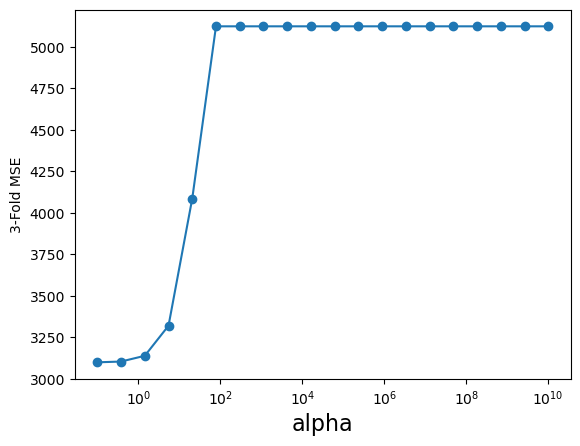

In [89]:
### AVERIGUO EL MEJOR ALPHA

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }

grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2, n_jobs=-1)
grid.fit(XtrainScaled, y_train)
print("Mejor puntuación media de validación cruzada: {:.3f}".format(grid.best_score_))
print("Mejores parametros: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [91]:
### REALIZO LASSO

from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))

feature_names = X_train.columns.tolist() 

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 3.05e+03
RMSE Modelo Lasso (train): 55.2
ID -1.0840610857812847
Scrape ID -3.3498212809703287
Host ID 1.2112513453702634
Host Response Rate 0.7778068311245798
Host Listings Count 4.97852598790906
Latitude -1.7318179720847369
Longitude -1.5975199207623672
Accommodates 18.88120690569827
Bathrooms 11.555988825098407
Bedrooms 13.699347005362451
Beds -5.403699315203768
Guests Included -0.29339622364970597
Extra People -1.5723932063918338
Minimum Nights 0.4026332469412931
Maximum Nights -0.08116308650472175
Availability 30 11.066200197550797
Availability 365 -0.9726564221667349
Number of Reviews 0.0
Review Scores Rating 4.1418190588201576
Review Scores Accuracy 2.909389911475445
Review Scores Cleanliness 3.1567345741326425
Review Scores Checkin -0.011706481496765082
Review Scores Communication -0.9662513236687713
Review Scores Location 5.514666623827767
Review Scores Value -5.082360403868372
Reviews per Month -5.14428199429489
Experiences Offered_business 1.18180721

In [93]:
### AVERIGUO 10 MEJORES VARIABLES

coef_series = pd.Series(data=lasso.coef_, index=X_train.columns)

# Selección de todas las variables que no han quedado a cero
selected_features = coef_series[coef_series != 0].index.tolist()
print("Variables seleccionadas (coef ≠ 0):", selected_features)

# Ranking por magnitud absoluta y top-k
top_k = 10
top10 = coef_series.abs().sort_values(ascending=False).head(top_k).index.tolist()
print(f"Top {top_k} variables por magnitud de coeficiente:", top10)

Variables seleccionadas (coef ≠ 0): ['ID', 'Scrape ID', 'Host ID', 'Host Response Rate', 'Host Listings Count', 'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 365', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month', 'Experiences Offered_business', 'Experiences Offered_family', 'Experiences Offered_none', 'Experiences Offered_social', 'Host Response Time_a few days or more', 'Host Response Time_within a day', 'Host Response Time_within an hour', 'Room Type_Entire home/apt', 'Room Type_Shared room', 'Bed Type_Couch', 'Bed Type_Futon', 'Bed Type_Real Bed']
Top 10 variables por magnitud de coeficiente: ['Accommodates', 'Room Type_Entire home/apt', 'Bedrooms', 'Bathrooms', 'Availability 30', 'Review Scores Loca

In [95]:
### b. Generación de variables

import pandas as pd
import numpy as np
X_train2 = airbnb_train5[top10].copy()

# 1.1. Interacción entre 'Bedrooms' y 'Bathrooms'
X_train2['Bedrooms_Bathrooms'] = X_train['Bedrooms'] * X_train['Bathrooms']

# 1.2. Proporción entre 'Accommodates' y 'Beds'
X_train2['Accommodates_Beds_Ratio'] = X_train['Accommodates'] / X_train['Beds'].replace(0, np.nan)

# 1.3. Porcentaje de disponibilidad del año
X_train2['Availability_Ratio'] = X_train['Availability 365'] / 365

# 1.4. Promedio de puntuaciones de reseñas
X_train2['Review_Score_Avg'] = X_train[['Review Scores Accuracy', 'Review Scores Location', 'Review Scores Cleanliness']].mean(axis=1)

# 1.5. Categorización del tipo de habitación
# X_train2['Room Type_Categorized'] = X_train[['Room Type_Entire home/apt', 'Room Type_Private room', 'Room Type_Shared room']].idxmax(axis=1)


# 2. Ver las nuevas columnas creadas
print("Nuevas columnas creadas:")
print(X_train2[['Bedrooms_Bathrooms', 'Accommodates_Beds_Ratio', 'Availability_Ratio', 'Review_Score_Avg']].head())


Nuevas columnas creadas:
   Bedrooms_Bathrooms  Accommodates_Beds_Ratio  Availability_Ratio  \
0                 1.0                    2.000            0.320548   
1                 1.0                    2.000            0.569863   
2                 1.5                    0.125            0.383562   
3                 3.0                    2.000            0.852055   
4                 1.0                    2.000            0.923288   

   Review_Score_Avg  
0          9.666667  
1          9.333333  
2         10.000000  
3         10.000000  
4          9.000000  


In [97]:
scaler2 = StandardScaler().fit(X_train2)
XtrainScaled2 = scaler2.transform(X_train2)

In [103]:
# 4. Modelado:
### a. Cross validation

alpha_vector = np.logspace(-1, 10, 20)
param_grid   = {'alpha': alpha_vector}

grid = GridSearchCV(Lasso(max_iter=1000),param_grid=param_grid,scoring='neg_mean_squared_error',cv=3,verbose=2,n_jobs=-1)
grid.fit(XtrainScaled2, y_train)

modelo_final = grid.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [105]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_final,XtrainScaled2, y_train,cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1)
rmse = -scores
print("Alpha optimo:", modelo_final.alpha)
print(f"RMSE medio: {rmse.mean():.2f} ± {rmse.std():.2f}")

Alpha optimo: 0.1
RMSE medio: 55.12 ± 3.22


In [107]:
# ELIMINACION NULOS
nulos = airbnb_train.isnull().mean()
eliminacion_columnas = nulos[nulos > 0.3].index
airbnb_train1 = airbnb_train.drop(columns=eliminacion_columnas)

# ELIMINACION CORRELACION
matriz_correlacion = airbnb_train1.select_dtypes(include=['number']).corr().abs()
trian_sup = matriz_correlacion.where(np.triu(np.ones(matriz_correlacion.shape), k=1).astype(bool))
columnas_correlacionadas = [column for column in trian_sup.columns if any(trian_sup[column] > 0.9)]
airbnb_train2 = airbnb_train1.drop(columns=columnas_correlacionadas)

# IMPUTO CON LA MEDIANA 
numeros_nulos = airbnb_train2.select_dtypes(include="number").columns[airbnb_train2.select_dtypes(include="number").isnull().any()]
mediana = airbnb_train2[numeros_nulos].median() 
airbnb_train2[numeros_nulos] = airbnb_train2[numeros_nulos].fillna(mediana) 

### IMPUTO CON LA MODA
elimino_col = []
for x in airbnb_train2.select_dtypes(include="object").columns: 
    if airbnb_train2[x].nunique() > 5:
        elimino_col.append(x)
airbnb_train3 = airbnb_train2.drop(columns=elimino_col) 
categoricas_nulas = airbnb_train3.select_dtypes(include="object").columns[airbnb_train3.select_dtypes(include="object").isnull().any()]
moda = airbnb_train3[categoricas_nulas].mode().iloc[0]
airbnb_train4 = airbnb_train3
airbnb_train4[categoricas_nulas] = airbnb_train3[categoricas_nulas].fillna(moda)

### CODIFICO
seleccion_code = airbnb_train4.select_dtypes(include="object").columns.tolist()
airbnb_train5 = pd.get_dummies(airbnb_train4, columns=seleccion_code, drop_first=True)

### ESCALO LOS DATOS
X_train = airbnb_train5.drop(columns=['Price'])
y_train = airbnb_train5['Price']
scaler = StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

### LASSO
alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2, n_jobs=-1)
grid.fit(XtrainScaled, y_train)
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)
coef_series = pd.Series(data=lasso.coef_, index=X_train.columns)
selected_features = coef_series[coef_series != 0].index.tolist()
top_k = 10
top10 = coef_series.abs().sort_values(ascending=False).head(top_k).index.tolist()

### CREACION VARIABLES, RECREAR X_TRAIN
X_train2 = airbnb_train5[top10].copy()
X_train2['Bedrooms_Bathrooms'] = X_train['Bedrooms'] * X_train['Bathrooms']
X_train2['Accommodates_Beds_Ratio'] = X_train['Accommodates'] / X_train['Beds'].replace(0, np.nan)
X_train2['Availability_Ratio'] = X_train['Availability 365'] / 365
X_train2['Review_Score_Avg'] = X_train[['Review Scores Accuracy', 'Review Scores Location', 'Review Scores Cleanliness']].mean(axis=1)

### RE-ESCALADO
scaler2 = StandardScaler().fit(X_train2)
XtrainScaled2 = scaler2.transform(X_train2)

# MODELADO
alpha_vector = np.logspace(-1, 10, 20)
param_grid   = {'alpha': alpha_vector}
grid = GridSearchCV(Lasso(max_iter=1000),param_grid=param_grid,scoring='neg_mean_squared_error',cv=3,verbose=2,n_jobs=-1)
grid.fit(XtrainScaled2, y_train)
modelo_final = grid.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [113]:
# b. Evaluación; mejor si lo hacéis de más de un modelo, porque así podéis comparar entre ellos.
airbnb_test = pd.read_csv(r'C:\Users\noeli\Desktop\Proyecto_ML\data\airbnb_test.csv', sep=';', decimal='.')

#Limpieza de null y correlacion
nulos = airbnb_train.isnull().mean()
eliminacion_columnas = nulos[nulos > 0.3].index
airbnb_test = airbnb_test.drop(columns=eliminacion_columnas)

matriz_correlacion = airbnb_train1.select_dtypes(include='number').corr().abs()
trian_sup = matriz_correlacion.where(np.triu(np.ones(matriz_correlacion.shape), k=1).astype(bool)) 
columnas_correlacionadas = [x for x in trian_sup.columns if any(trian_sup[x] > 0.9)]
airbnb_test = airbnb_test.drop(columns=columnas_correlacionadas)

#Imputacion
#Imput de numericas
numeros_nulos = airbnb_test.select_dtypes(include="number").columns[airbnb_test.select_dtypes(include="number").isnull().any()]
mediana = airbnb_train2[numeros_nulos].median()
airbnb_test[numeros_nulos] = airbnb_test[numeros_nulos].fillna(mediana)

#Limpieza si hay mas de 5 categorias
elimino_col = []
for x in airbnb_train2.select_dtypes(include="object").columns:
    if airbnb_train2[x].nunique() > 5:
        elimino_col.append(x)
airbnb_test = airbnb_test.drop(columns=elimino_col)

#Imput de categoricas
categoricas_nulas = airbnb_test.select_dtypes(include="object").columns[airbnb_test.select_dtypes(include="object").isnull().any()]
moda = airbnb_train3[categoricas_nulas].mode().iloc[0]
airbnb_test[categoricas_nulas] = airbnb_test[categoricas_nulas].fillna(moda)

#ONE-HOT ENCODING
seleccion_code = airbnb_train4.select_dtypes(include="object").columns.tolist()
airbnb_test = pd.get_dummies(airbnb_test, columns=seleccion_code, drop_first=True)

#CREO X (CON EL TOP DE COLUMNAS QUE HALLÉ CON LASSO EN TRAIN) E Y
X_test = airbnb_test.copy()
X_test1 = airbnb_test[top10].copy()
y_test = airbnb_test["Price"]

X_test1['Bedrooms_Bathrooms'] = X_test['Bedrooms'] * X_test['Bathrooms']

X_test1['Accommodates_Beds_Ratio'] = X_test['Accommodates'] / X_test['Beds'].replace(0, np.nan)

X_test1['Availability_Ratio'] = X_test['Availability 365'] / 365

X_test1['Review_Score_Avg'] = X_test[['Review Scores Accuracy', 'Review Scores Location', 'Review Scores Cleanliness']].mean(axis=1)


#ESCALO
XtestScaled = scaler2.transform(X_test1)

#Predecir con test
y_pred_test = modelo_final.predict(XtestScaled)

In [121]:
conclusion = pd.DataFrame({'Real': y_test,'Prediccion': y_pred_test})
print(conclusion)

       Real  Prediccion
0      15.0   22.266982
1      25.0   22.002116
2      45.0   78.472960
3      25.0   54.643514
4      40.0   68.044301
...     ...         ...
2951   23.0   60.738560
2952   52.0   63.722249
2953   23.0   36.117824
2954  104.0  114.538898
2955   95.0  138.639418

[2956 rows x 2 columns]


In [123]:
mseTrainModelLasso2 = mean_squared_error(y_test,y_pred_test)
print('MSE Modelo Lasso (test): %0.3g' % mseTrainModelLasso2)
print('RMSE Modelo Lasso (test): %0.3g' % np.sqrt(mseTrainModelLasso2))

MSE Modelo Lasso (test): 3.11e+03
RMSE Modelo Lasso (test): 55.7


# rmse media de error de 55.7

In [30]:
# 5. Conclusión: escrita, no numérica; un par de líneas es más que suficiente.

# El objetivo de este proyecto fue desarrollar un modelo de machine learning capaz de predecir el precio de los listados de Airbnb.
# He optado por la regresión Lasso por su capacidad para realizar selección automática de variables. El rendimiento del modelo obtuvo RMSE de 55.7, significa que las predicciones se pueden desviar en unos 55€, algo considerable.
# Durante la evaluación, se observan casos en los que el modelo subestimó o sobreestimó el precio real, lo cual sugiere que hay factores que no se tienen en cuenta como la estacionalidad o eventos locales.
# Pese a esto Lasso demuestra ser una opción sólida y fácil de interpretar para este problema.